In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [2]:
base_dados = pd.read_csv('C:/Users/Thalles Rodrigues/Documents/CSVs/PS4_GamesSales.csv', encoding='latin-1')

In [3]:
base_dados.shape

(1034, 9)

In [4]:
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [5]:
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

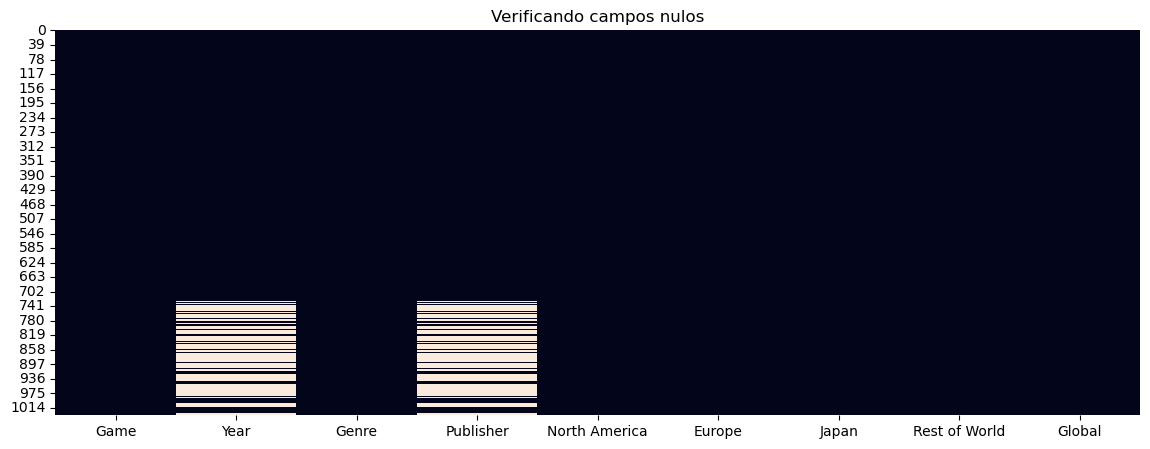

In [6]:
plt.figure(figsize=(14,5))
plt.title('Verificando campos nulos')
sns.heatmap(base_dados.isnull(), cbar=False);

In [7]:
base_dados.dropna(inplace=True)

In [8]:
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


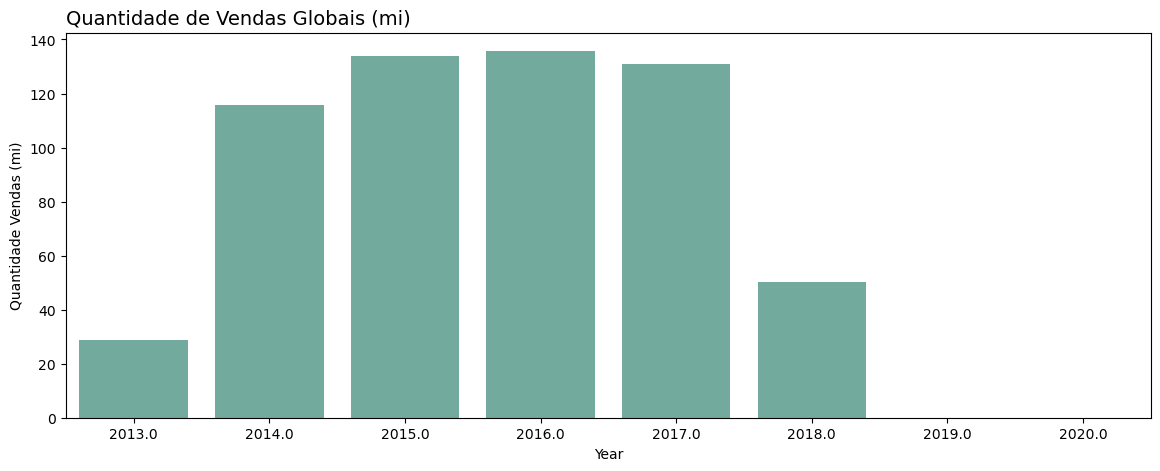

In [9]:
plt.figure(figsize=(14,5))
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14)
sns.barplot(data=base_dados, x="Year", y='Global', ci=None, color = '#69b3a2', estimator=sum) # ci=None é para tirar o pavil da vela
plt.ylabel('Quantidade Vendas (mi)');                                          # color = '#69b3a2' é a nova cor das barras

# o estimator=sum está sendo usado para somar todas as vendas globais em cada ano 
# e exibir o resultado no gráfico de barras. Isso significa 
# que o valor exibido em cada barra corresponderá à soma das vendas globais 
# para aquele ano específico.


In [10]:
base_dados=base_dados.loc[(base_dados['Year'] !=2019) & (base_dados['Year'] !=2020)]
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


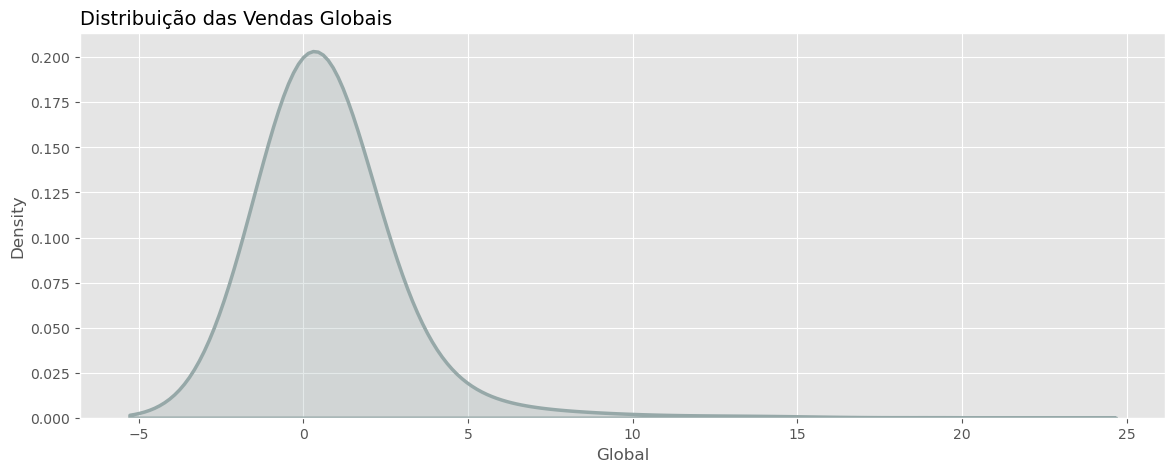

In [11]:
plt.figure(figsize=(14,5))

plt.style.use('ggplot')
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14)
sns.kdeplot(base_dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

In [12]:
analise = base_dados.groupby(by=['Year']).sum()

In [13]:
analise

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


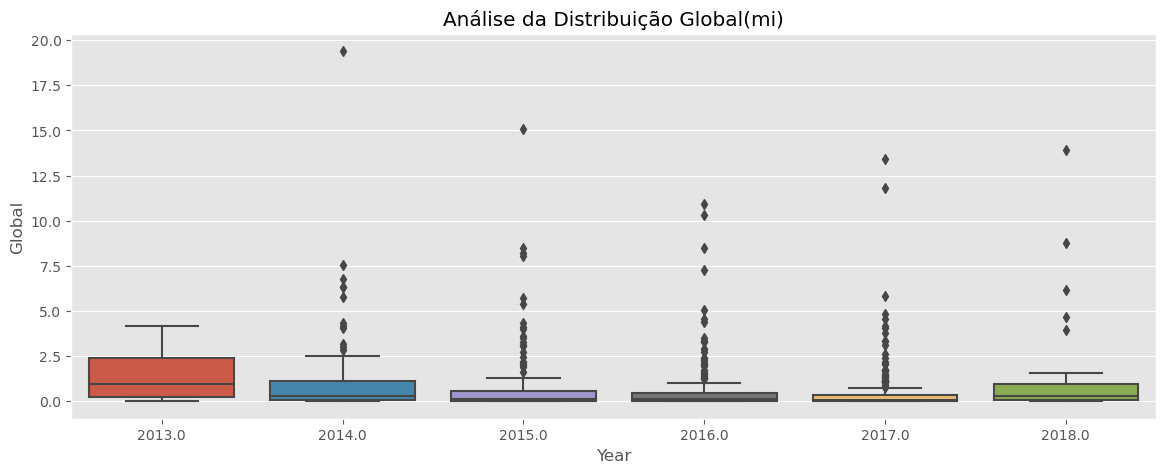

In [14]:
plt.figure(figsize=(14,5))
plt.title('Análise da Distribuição Global(mi)')
sns.boxplot(data=base_dados, x='Year', y='Global');

In [15]:
base_dados.loc[base_dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [16]:
America = [America/Total*100 for America, Total in zip( analise['North America'], analise['Global'])]
Europa = [Europa/Total*100 for Europa, Total in zip( analise['Europe'], analise['Global'])]
Japao = [Japao/Total*100 for Japao, Total in zip( analise['Japan'], analise['Global'])]
Mundo = [Mundo/Total*100 for Mundo, Total in zip( analise['Rest of World'], analise['Global'])]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

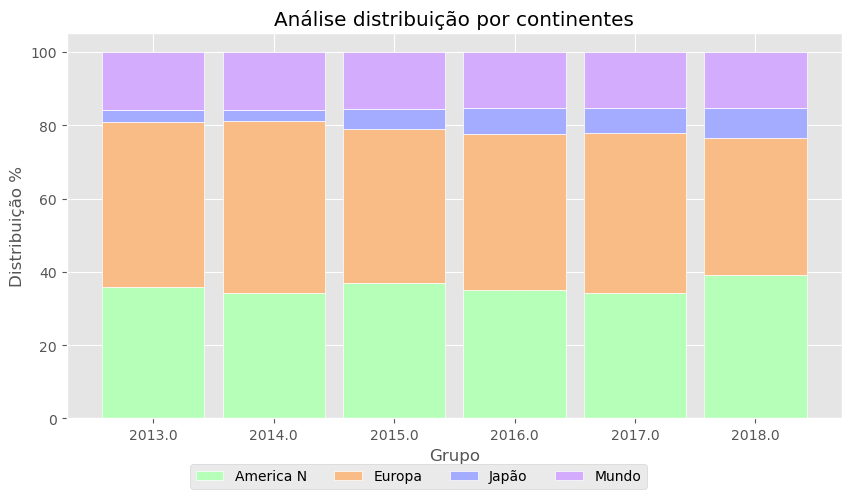

In [17]:
plt.figure(figsize=(10,5))

Largura_Barra = 0.85
Rotulos = analise.index
Grupos = [0, 1, 2, 3, 4, 5]

plt.title('Análise distribuição por continentes');

plt.bar(Grupos, America, 
        width=Largura_Barra, 
        color='#b5ffb9', 
        edgecolor='white')

plt.bar(Grupos, Europa, 
        bottom=America, 
        width=Largura_Barra, 
        color='#f9bc86', 
        edgecolor='white')

plt.bar(Grupos, Japao, 
        bottom=[A+B for A, B in zip(America, Europa)], 
        width=Largura_Barra, 
        color='#a3acff', 
        edgecolor='white')

plt.bar(Grupos, Mundo, 
        bottom=[A+B+C for A, B, C in zip(America, Europa, Japao)], 
        width=Largura_Barra, 
        color='#d3acfe', 
        edgecolor='white')

plt.xticks(Grupos, Rotulos);
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left',bbox_to_anchor=(0.15, -0.1), ncol=4);


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
base_dados['Produtor']=le.fit_transform(base_dados['Publisher'])
base_dados['Genero']=le.fit_transform(base_dados['Genre'])
base_dados['Jogo']=le.fit_transform(base_dados['Game'])

In [21]:
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [22]:
paleta_cores= sns.color_palette('husl', 8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

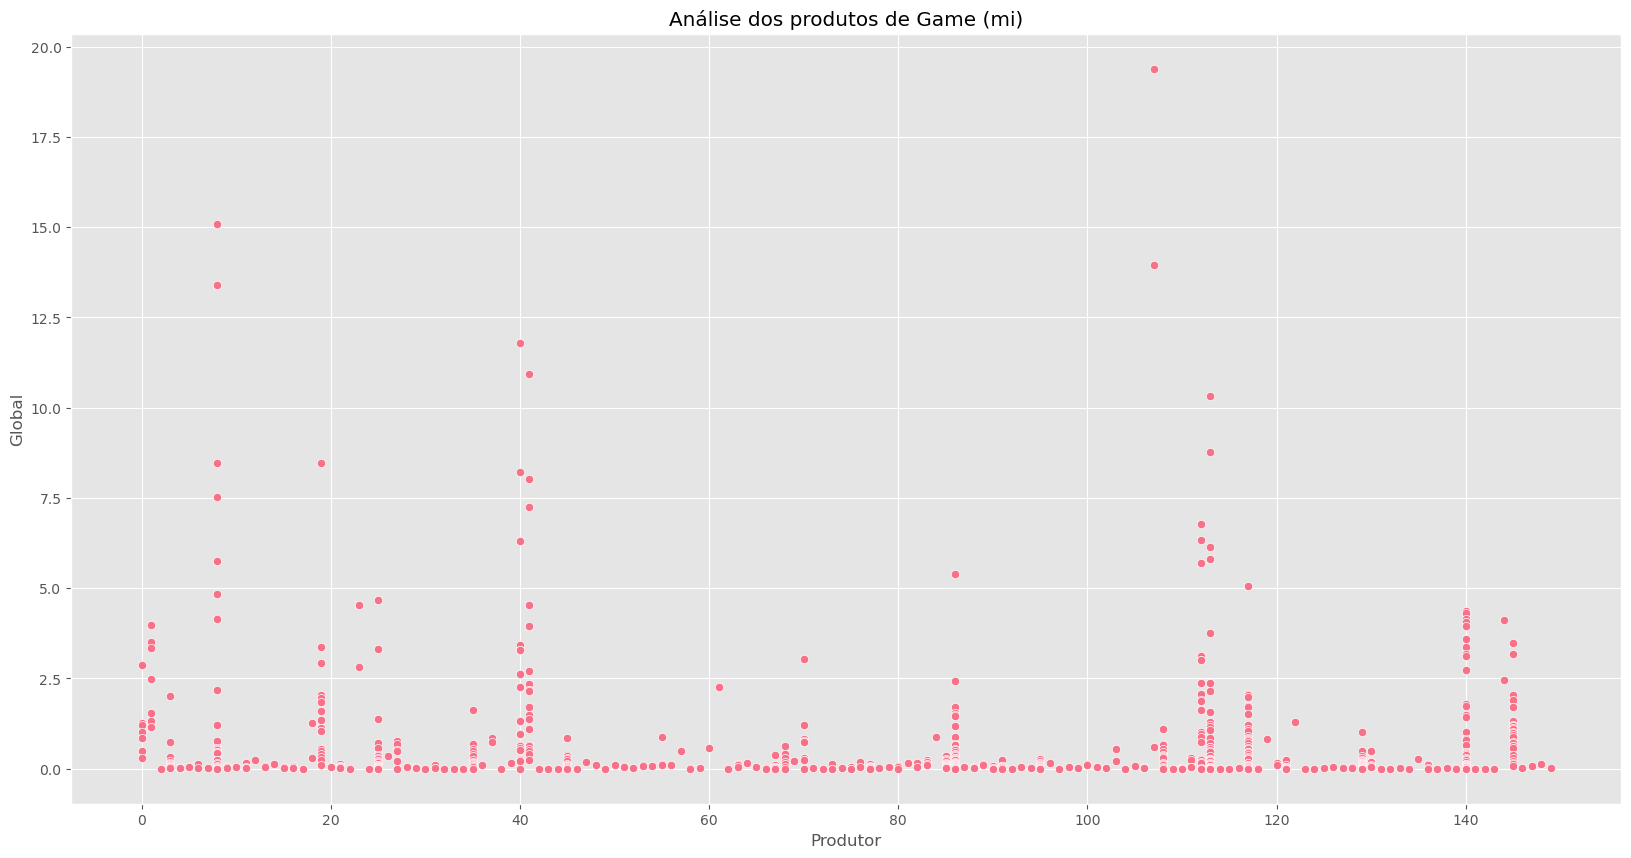

In [23]:
plt.figure(figsize=(20,10))
plt.title('Análise dos produtos de Game (mi)')
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[0]);

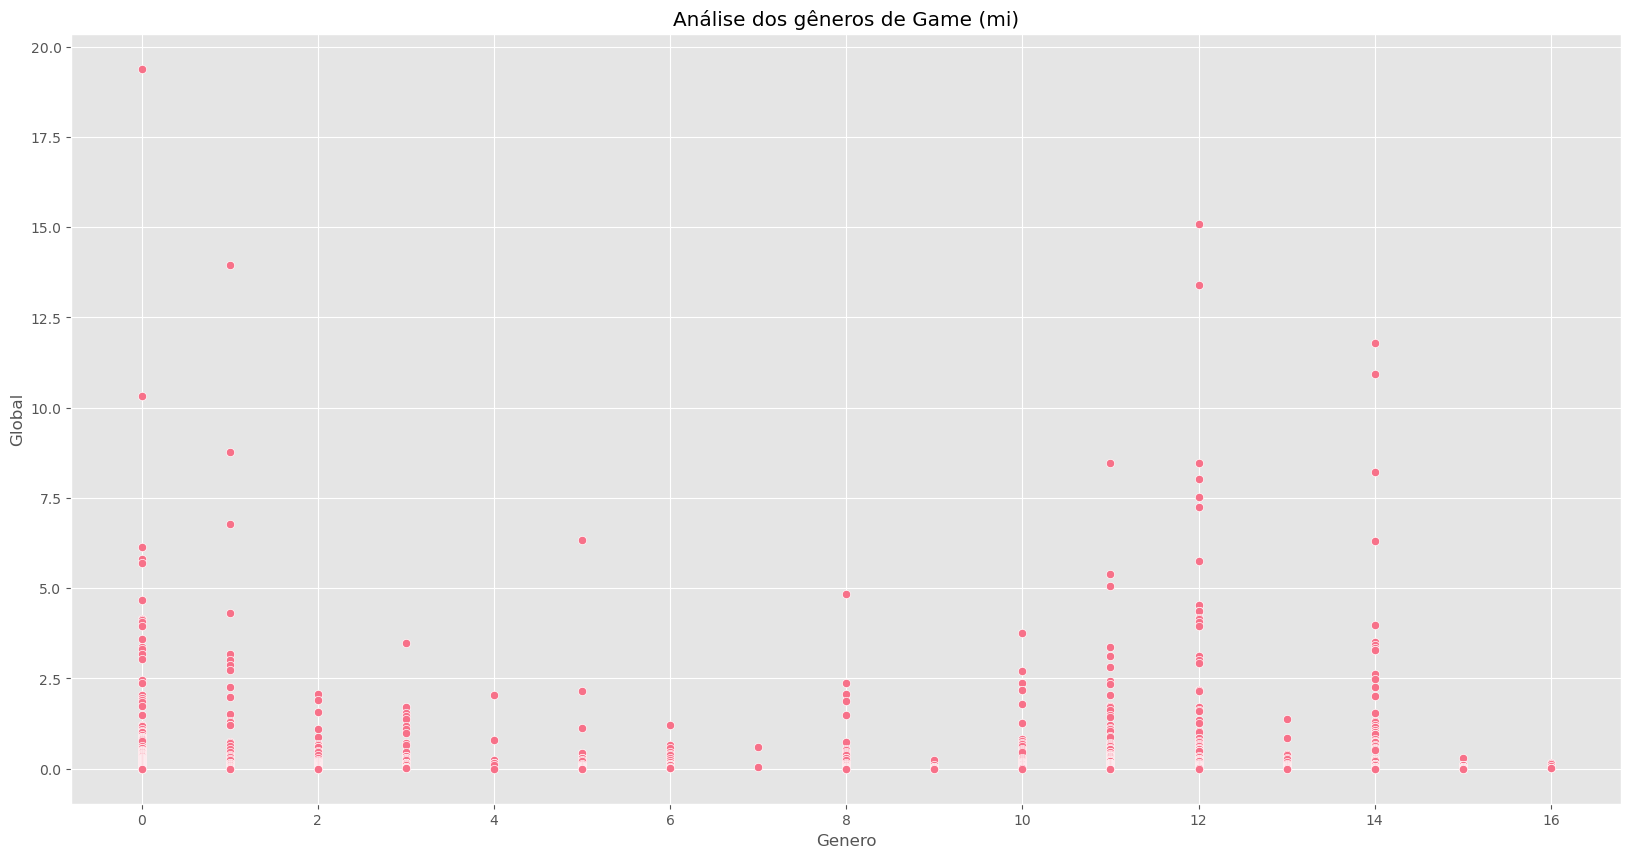

In [24]:
plt.figure(figsize=(20,10))
plt.title('Análise dos gêneros de Game (mi)')
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[0]);

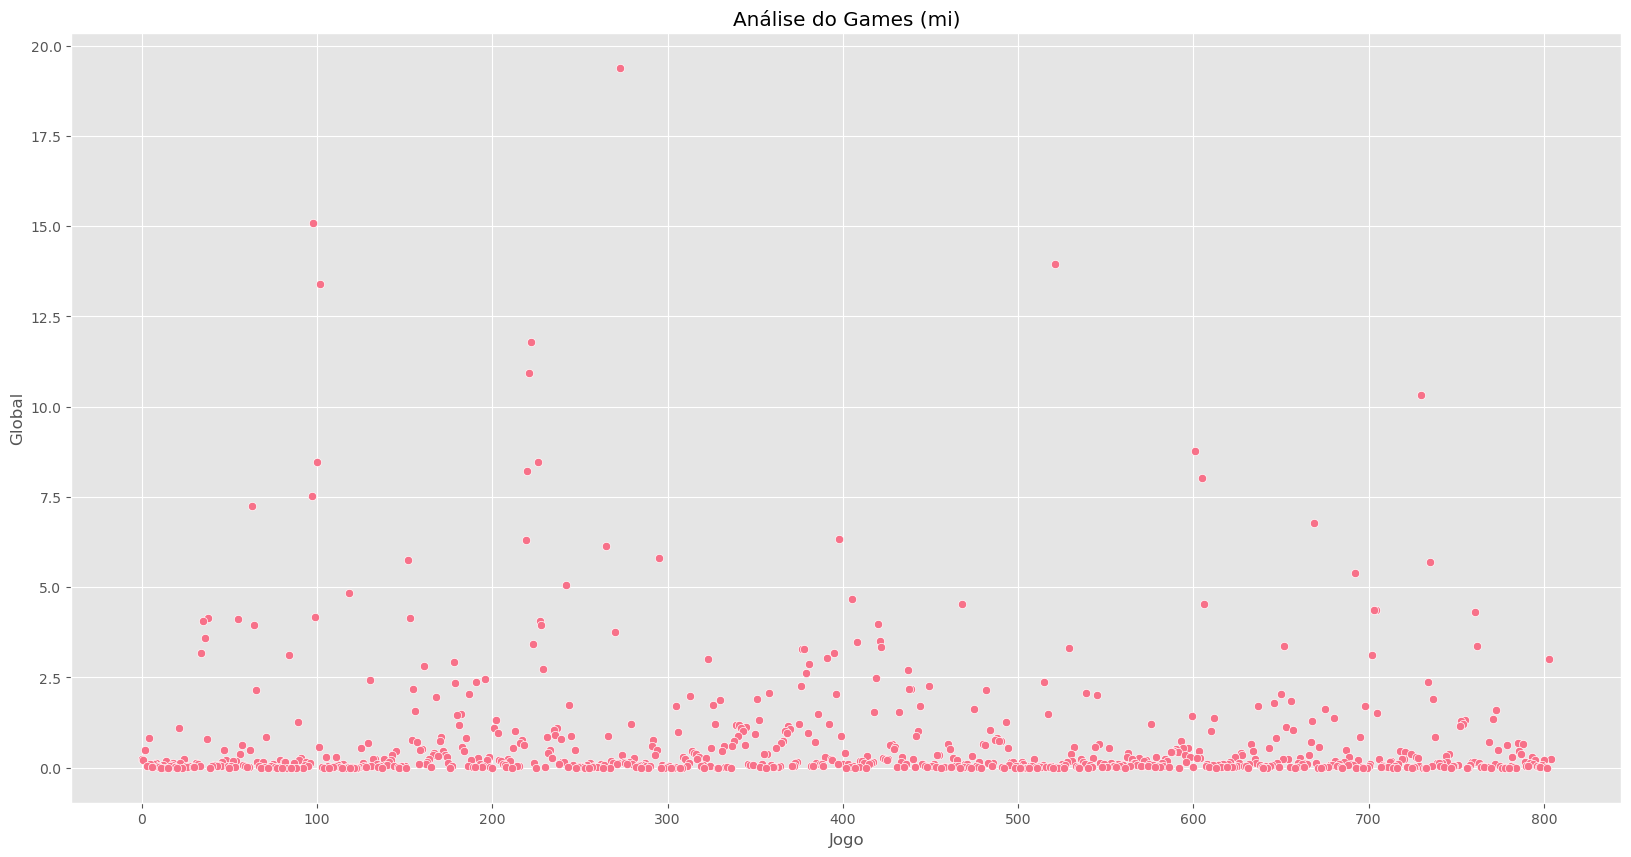

In [25]:
plt.figure(figsize=(20,10))
plt.title('Análise do Games (mi)')
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[0]);

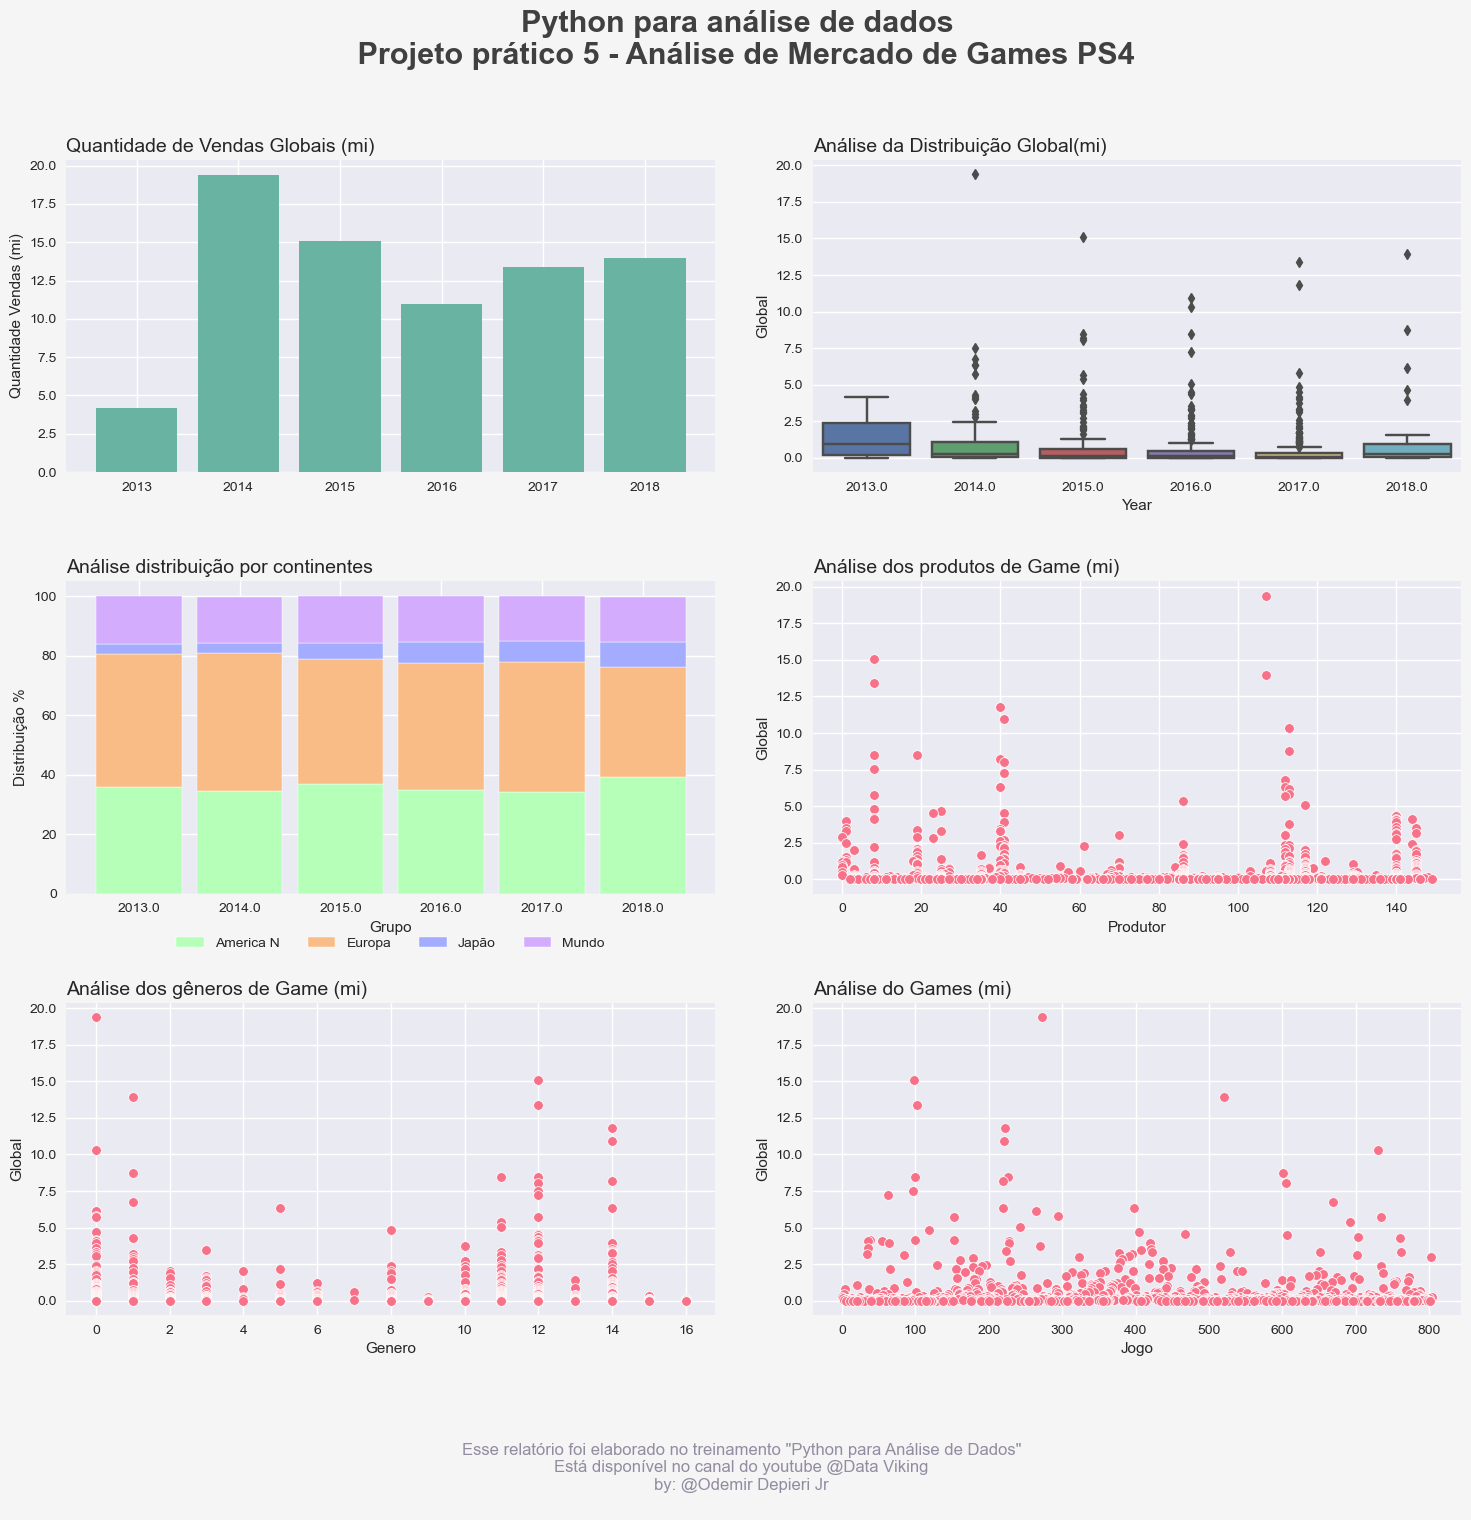

In [44]:
fig, ax = plt.subplots(figsize=(18,15))

# cor de fundo
cor_fundo='#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# estilo dos gráficos
plt.style.use('seaborn')

#título da figura
plt.suptitle('Python para análise de dados \n Projeto prático 5 - Análise de Mercado de Games PS4', 
             fontsize=22, 
             color='#404040',
            fontweight=600)

# parâmetros para o grid
colunas=2
linhas=3


# acessando gráfico 1
plt.subplot(linhas, colunas, 1)
# título
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14)
# gráfico
plt.bar(base_dados['Year'], base_dados['Global'], color = '#69b3a2') 
# label
plt.ylabel('Quantidade Vendas (mi)')


# acessando gráfico 2
plt.subplot(linhas, colunas, 2)
plt.title('Análise da Distribuição Global(mi)', loc='left', fontsize=14)
sns.boxplot(data=base_dados, x='Year', y='Global');


# acessando gráfico 3
plt.subplot(linhas, colunas, 3)

#======================================================

Largura_Barra = 0.85
Rotulos = analise.index
Grupos = [0, 1, 2, 3, 4, 5]

plt.title('Análise distribuição por continentes', loc='left', fontsize=14);

plt.bar(Grupos, America, 
        width=Largura_Barra, 
        color='#b5ffb9', 
        edgecolor='white')

plt.bar(Grupos, Europa, 
        bottom=America, 
        width=Largura_Barra, 
        color='#f9bc86', 
        edgecolor='white')

plt.bar(Grupos, Japao, 
        bottom=[A+B for A, B in zip(America, Europa)], 
        width=Largura_Barra, 
        color='#a3acff', 
        edgecolor='white')

plt.bar(Grupos, Mundo, 
        bottom=[A+B+C for A, B, C in zip(America, Europa, Japao)], 
        width=Largura_Barra, 
        color='#d3acfe', 
        edgecolor='white')

plt.xticks(Grupos, Rotulos);
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left',bbox_to_anchor=(0.15, -0.1), ncol=4);

#======================================================


# acessando gráfico 4
plt.subplot(linhas, colunas, 4)
plt.title('Análise dos produtos de Game (mi)', loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[0]);


# acessando gráfico 5
plt.subplot(linhas, colunas, 5)
plt.title('Análise dos gêneros de Game (mi)', loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[0]);

# acessando gráfico 6
plt.subplot(linhas, colunas, 6);
plt.title('Análise do Games (mi)', loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[0]);

#ajustar o layout
plt.subplots_adjust(hspace=0.35, wspace=0.15)

# rodapé
rodape='''
Esse relatório foi elaborado no treinamento "Python para Análise de Dados"
Está disponível no canal do youtube @Data Viking
by: @Odemir Depieri Jr
'''

fig.text(0.5 ,-0.02, rodape, ha='center', va='bottom', size=12, color='#938ca1');